In [1]:
# base libraries
import warnings; warnings.simplefilter('ignore')
import os
import sys

# external libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display_javascript, display_html, display

# local libraries
sys.path.append(os.path.abspath("../"))
import readme_utils

matplotlib.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
sns.set_palette('deep')

# Load baseline data for the Benchmark

In [2]:
info = readme_utils.io.load_benchmark_info("_info.yaml")
readme_utils.plot.show_info(info)

Benchmark 
 
 
 ID 
 CATH 
 # motifs 
 
 
 T05 
 CATH.3.10.20.30 
 1 
 
 
 Structures 
 
 
 Query 
 Reference 
 
 
 2pkoA.pdb 
 2q5wD.pdb 
 
 
 Design 
 
 
 motif 
 chain 
 sequence shift 
 
 
 49-64 
 A 
 1 
 
 
 Experiments 
 abinitio 
 nubinitio 
 
 
 Fragment types 
 
 
 auto 
 Automatic fragment generation (sequence + secondary structure) 
 
 
 picker 
 Standard Rosetta fragment generation (sequence-based data) 
 
 
 wauto 
 Automatic fragment generation (secondary structure + angles + sasa)

In [3]:
base = readme_utils.io.load_baseline(info)
base

,score,lbl_CORE,lbl_PICKED,lbl_MOTIF,lbl_QUERY,sequence_A,structure_A,lbl_CONTACTS
0,-130.176,[A],[A],[A],[A],MVNVKVEFLGGLDAIFGKQRVHKIKMDKEDPVTVGDLIDHIVSTMINNPNDVSIFIEDDSIRPGIITLINDTDWELEGEKDYILEDGDIISFTS,LEEEEEEEELLHHHHLLLLLEEEEEELLLLLLEHHHHHHHHHHHLLLLHHHHHHHELLLLELLLLEEEELLEEHHHLLHHHLELLLLLEEEEEL,"8,11-12,14-17,34-35,38-39,41-43,45-48,65-67,74,79-80,92-94"


# Fragment analysis

In [4]:
fragments = readme_utils.io.load_fragments( info )

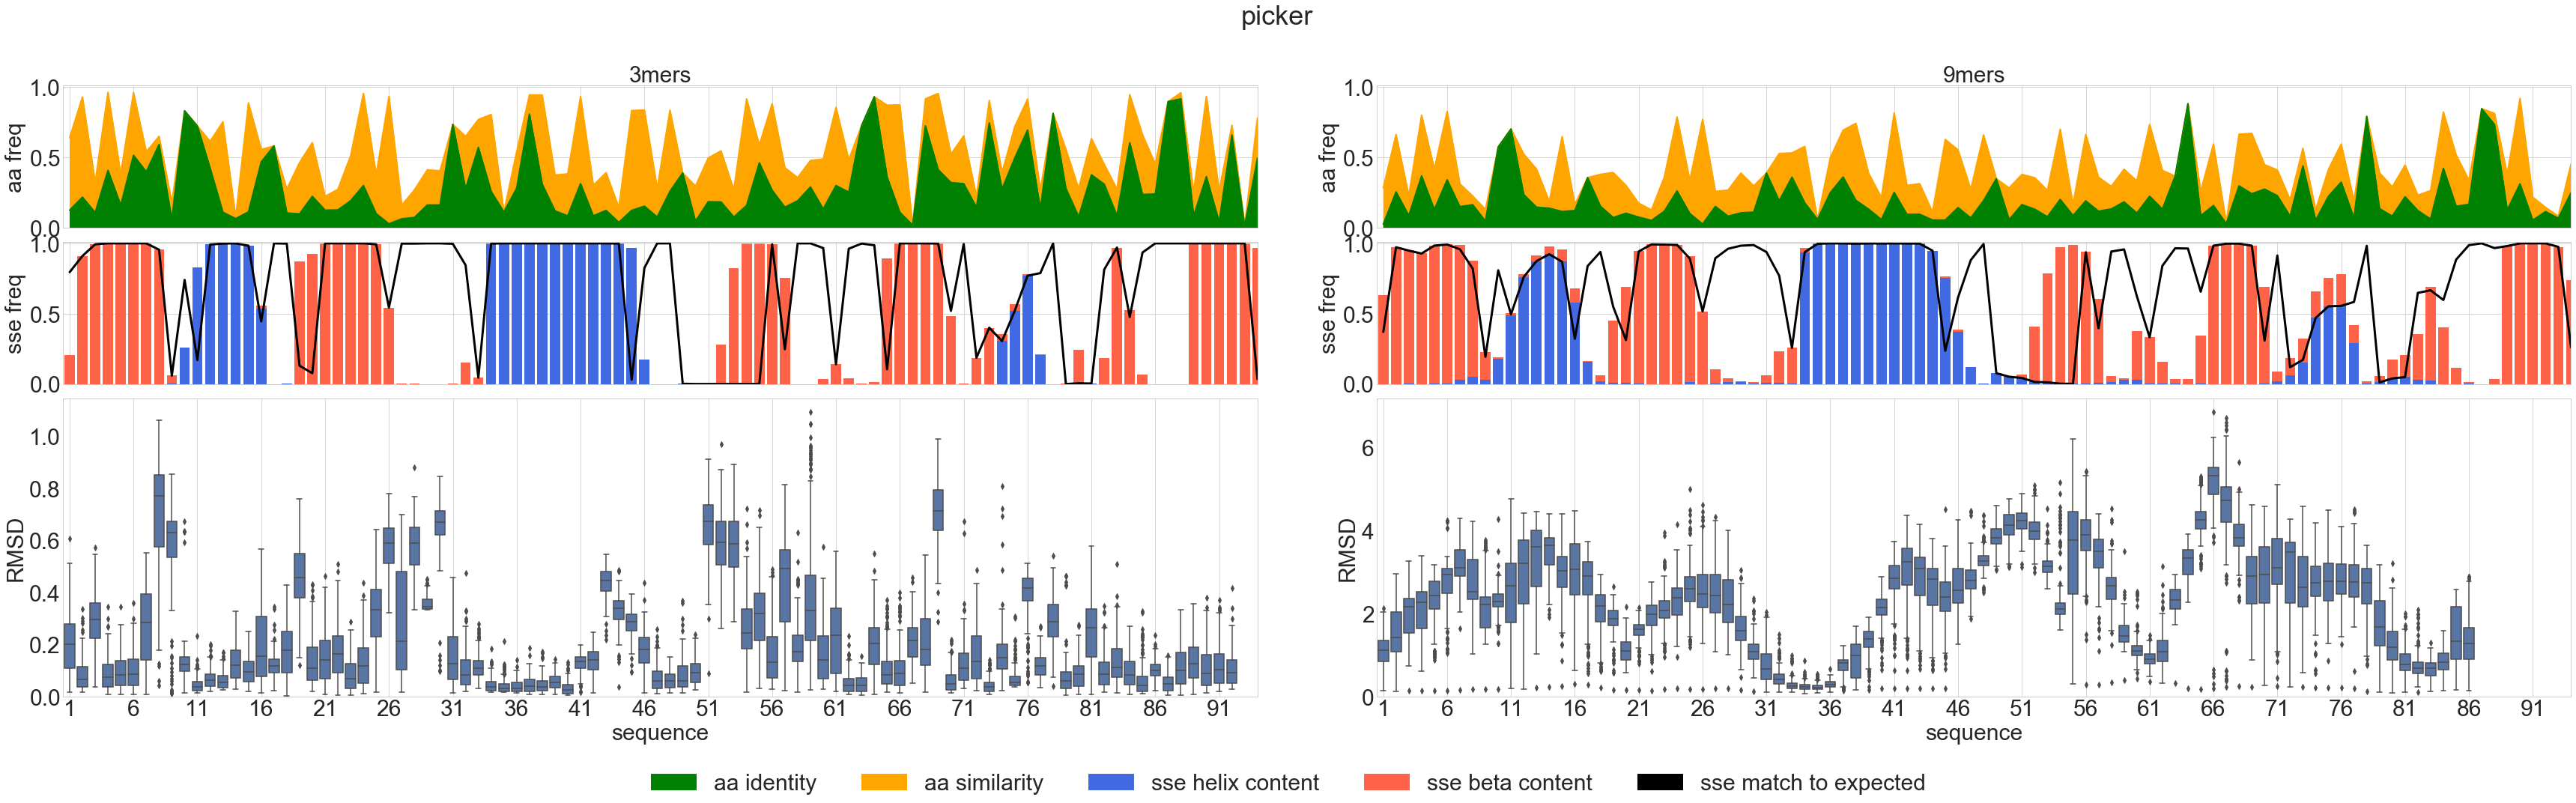

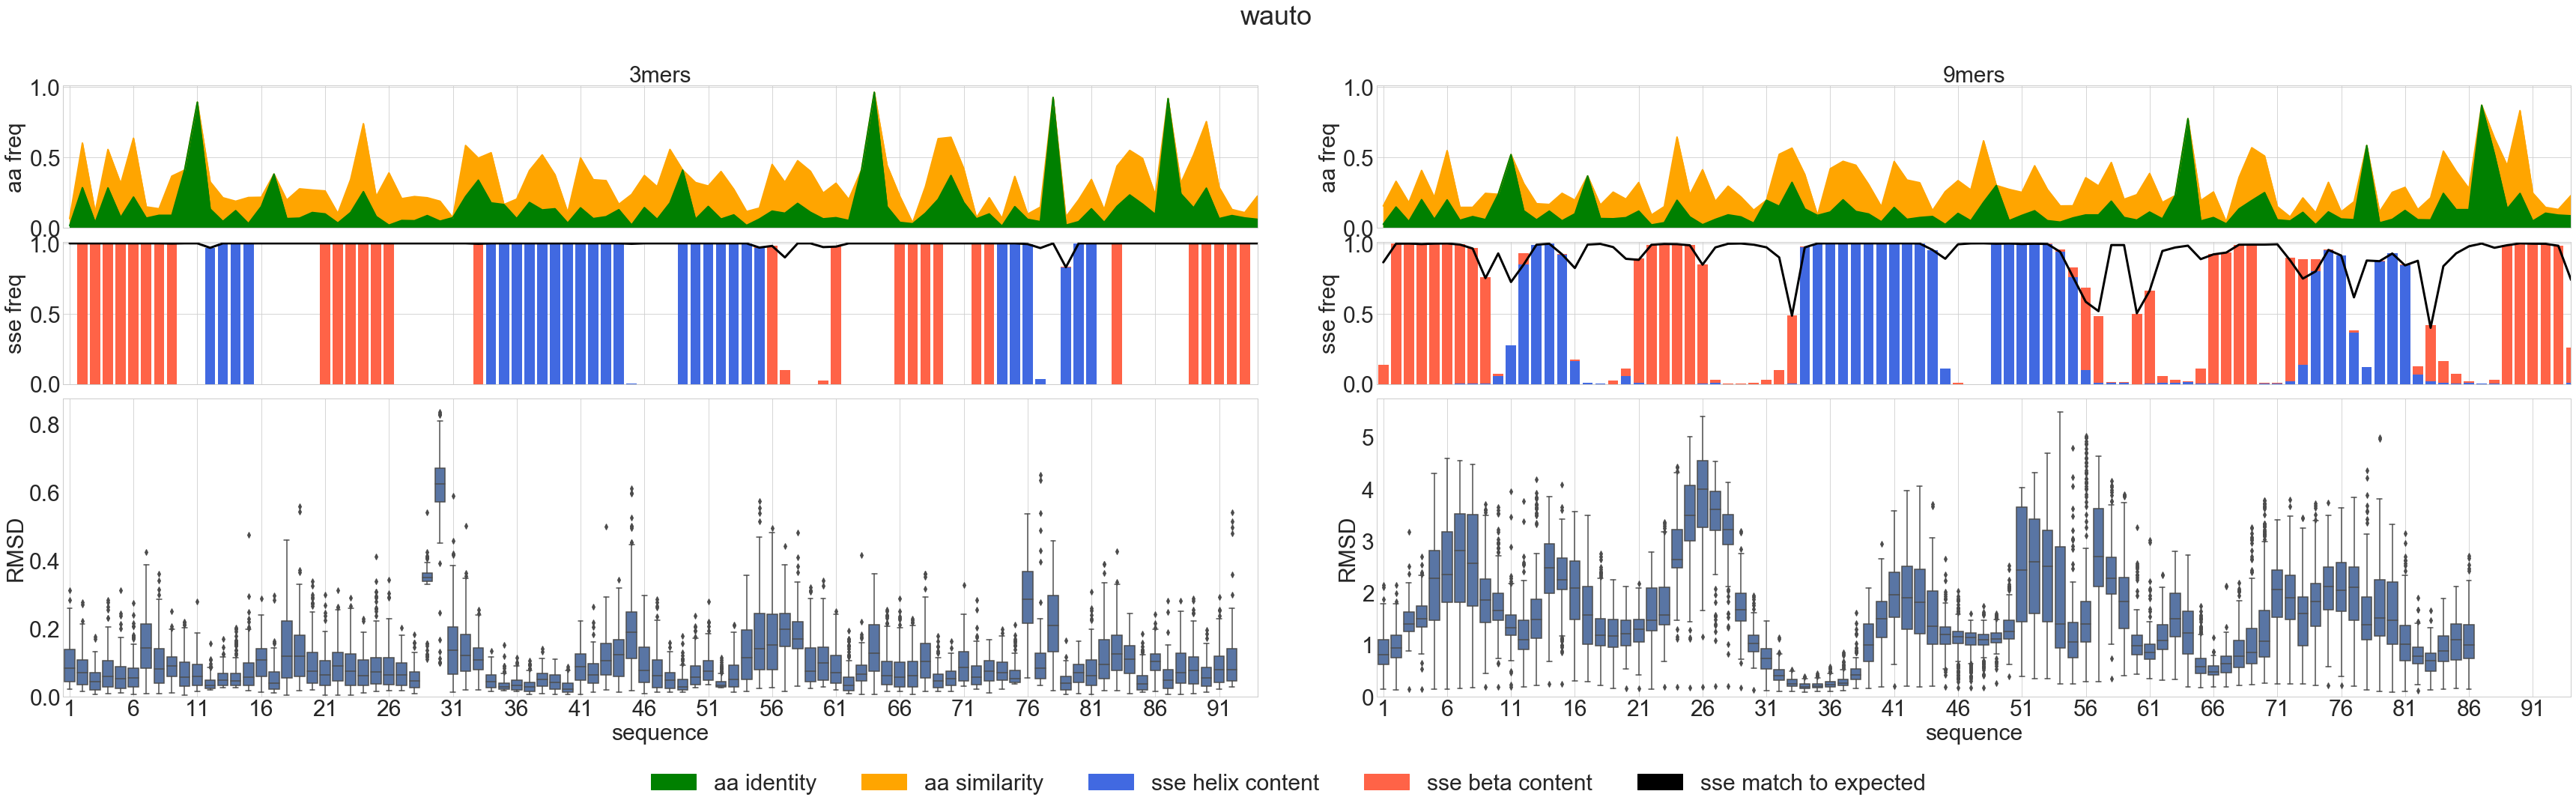

In [5]:
matplotlib.rcParams.update({'font.size': 30})
readme_utils.plot.plot_fragments( fragments, info, base )

# Main data analysis

In [6]:
df = readme_utils.io.load_main_data( info, base )

In [7]:
print "columns:", ", ".join([str(x) for x in df.columns.values]), "\n"
df.groupby(["experiment", "fragments"]).count()["description"]

columns: score, ALIGNRMSD, A_ni_mtcontacts, A_ni_rmsd, A_ni_rmsd_threshold, A_ni_trials, BUNS, COMPRRMSD, MOTIFRMSD, cav_vol, driftRMSD, finalRMSD, packstat, A_ni_rmsd_type, description, experiment, fragments, sequence_A, benchmark 



experiment  fragments
abinitio    auto         10076
            picker       10291
            wauto        10296
nubinitio   auto         10263
            picker       10274
            wauto        10296
Name: description, dtype: int64

## Compare FFL vs. abinitio RMSD

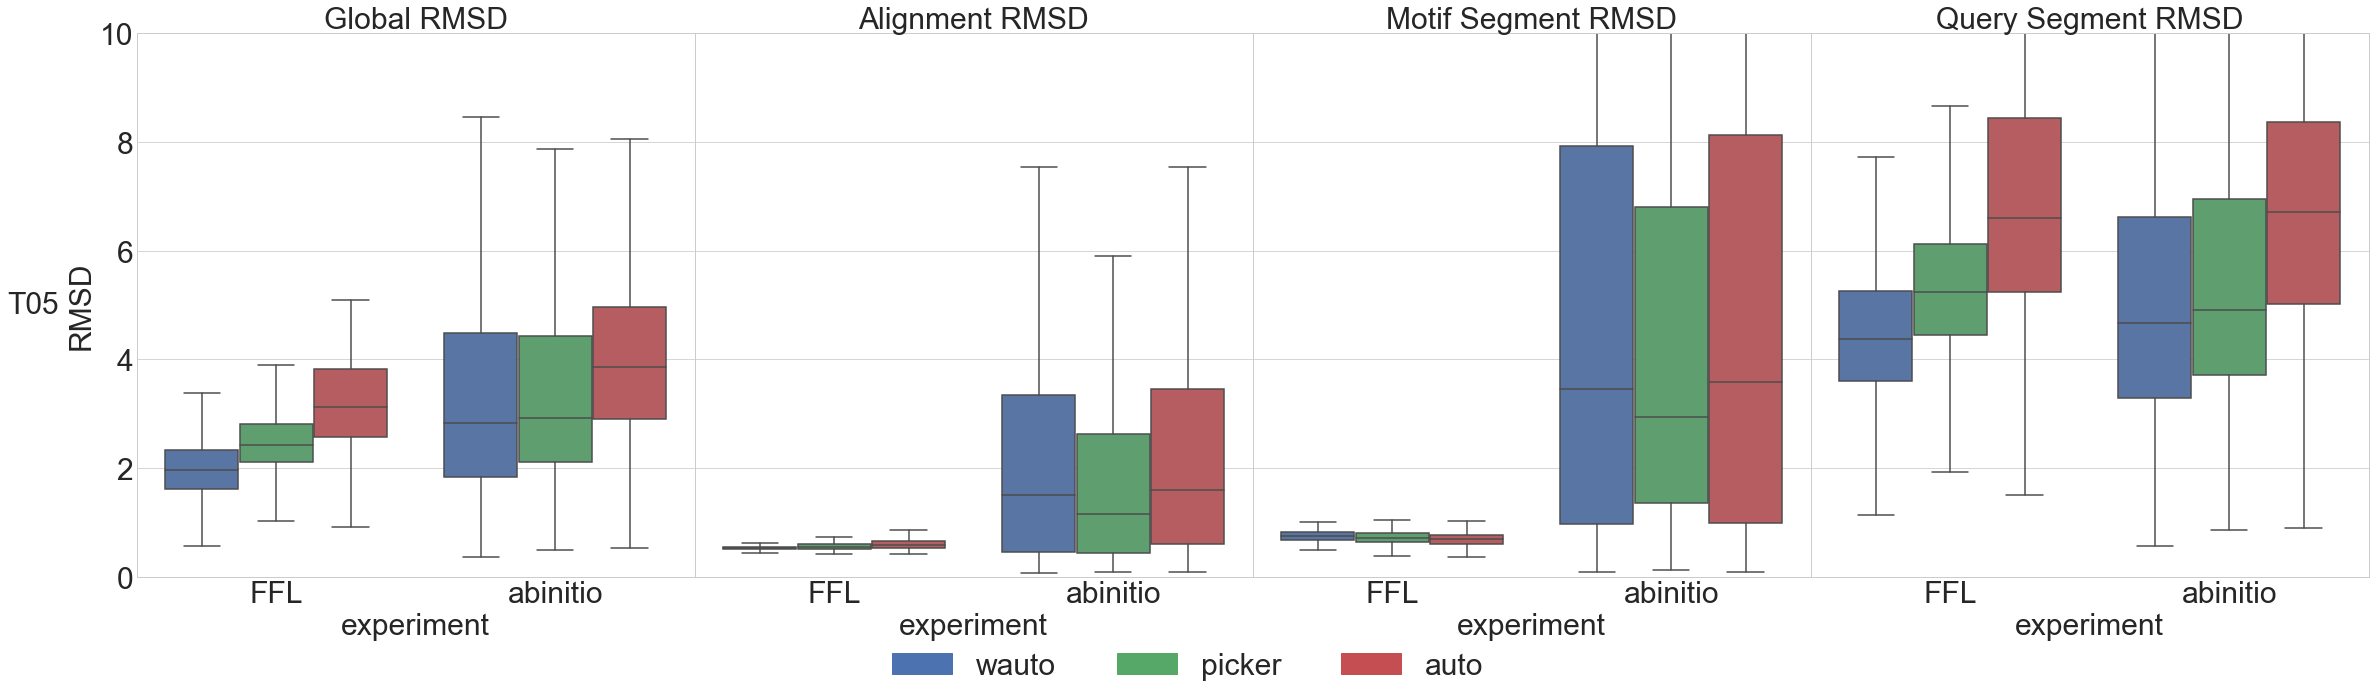

In [8]:
matplotlib.rcParams.update({'font.size': 30})
readme_utils.plot.plot_main_summary( df )

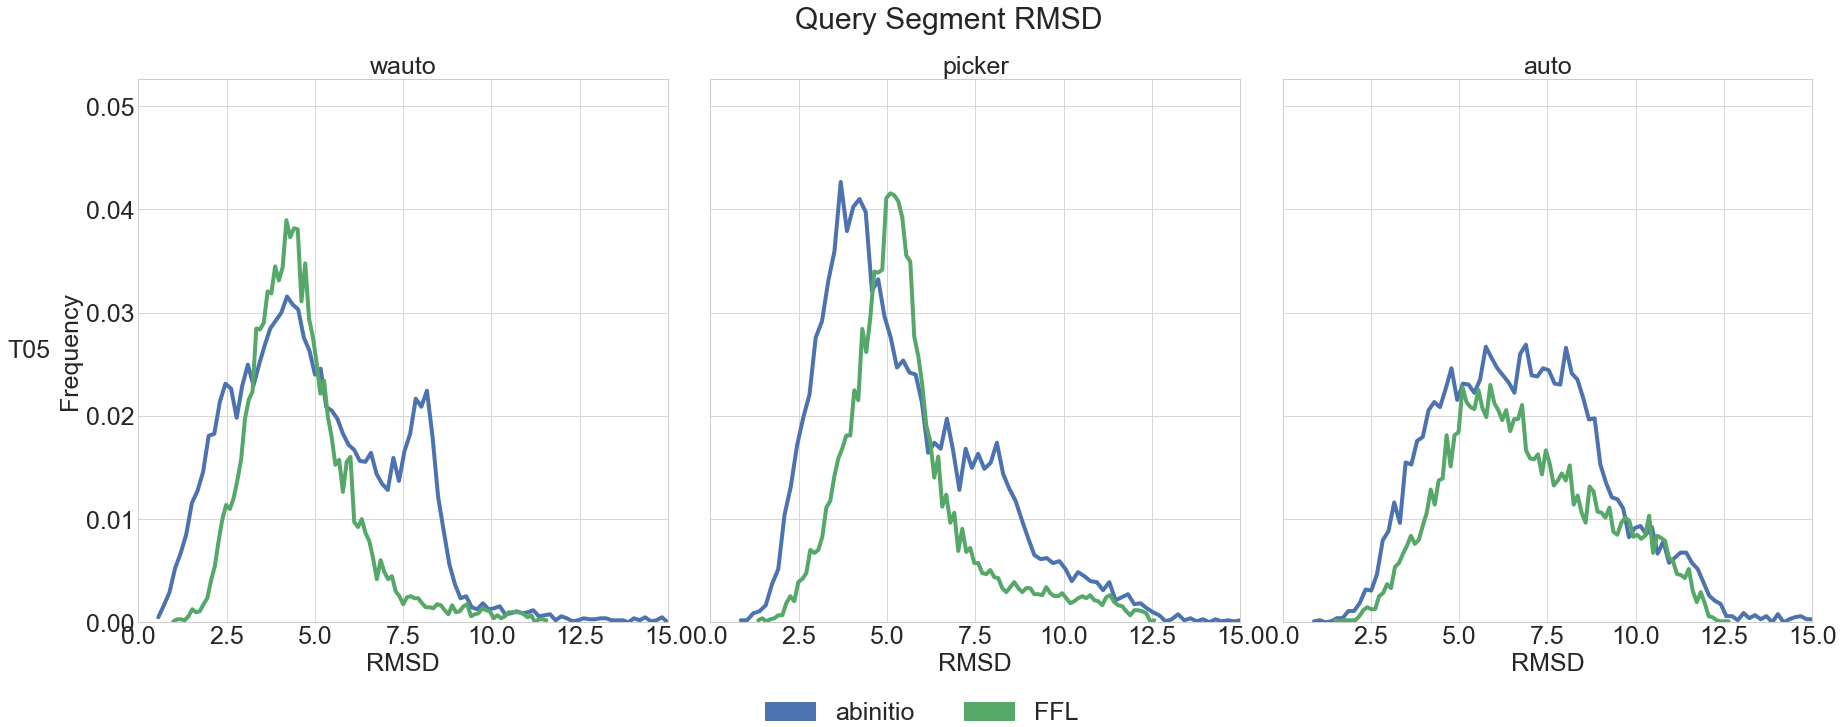

In [9]:
matplotlib.rcParams.update({'font.size': 25})
readme_utils.plot.plot_main_distributions( df, 15 )

## FFL sequence retrieval

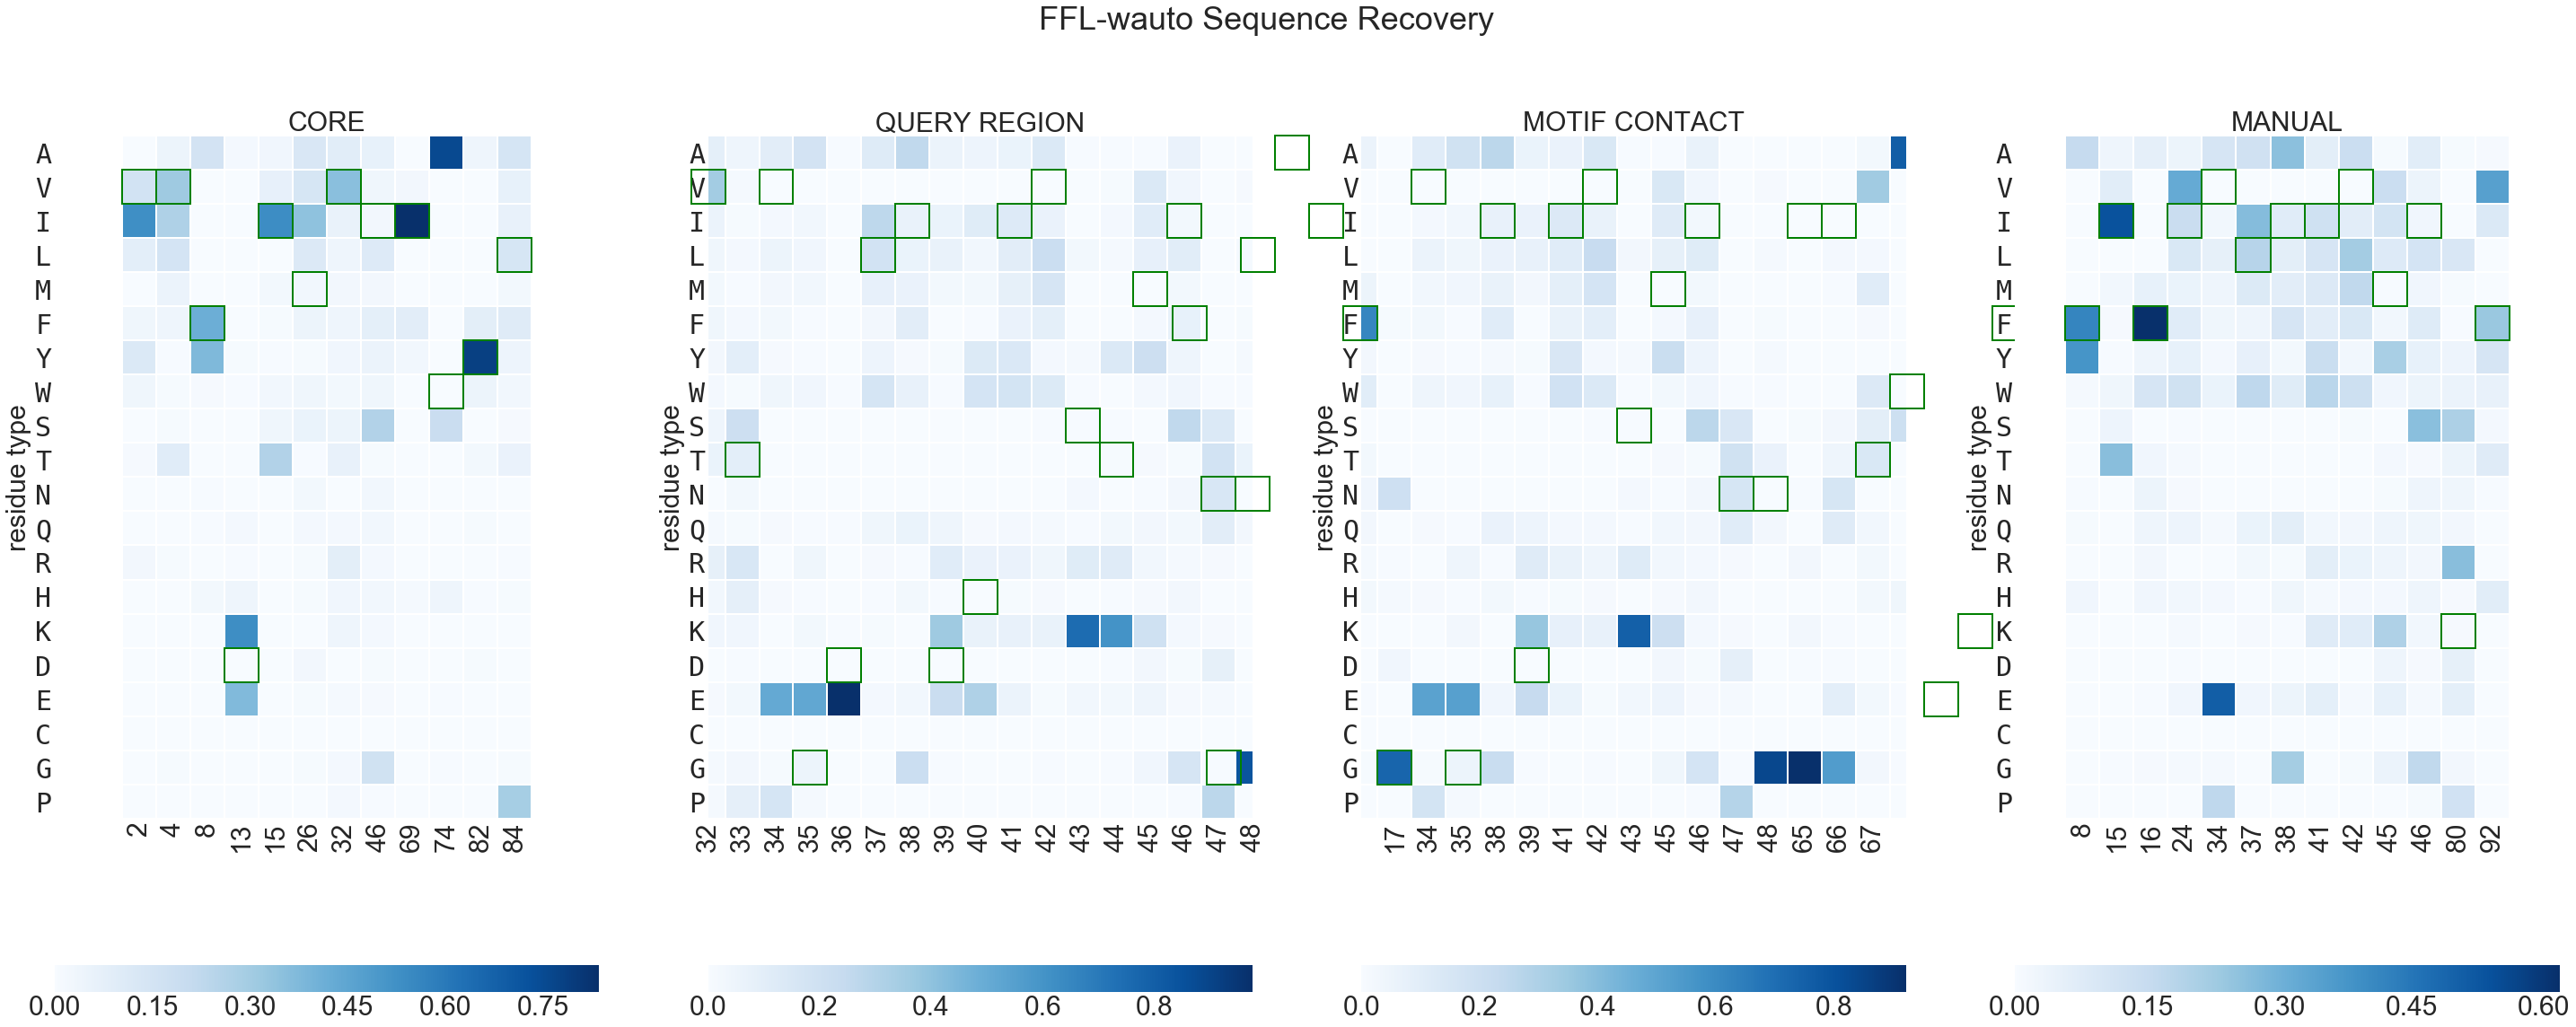

In [10]:
matplotlib.rcParams.update({'font.size': 30})
readme_utils.plot.plot_aa_heatmaps( df, info, base, 0.1 )

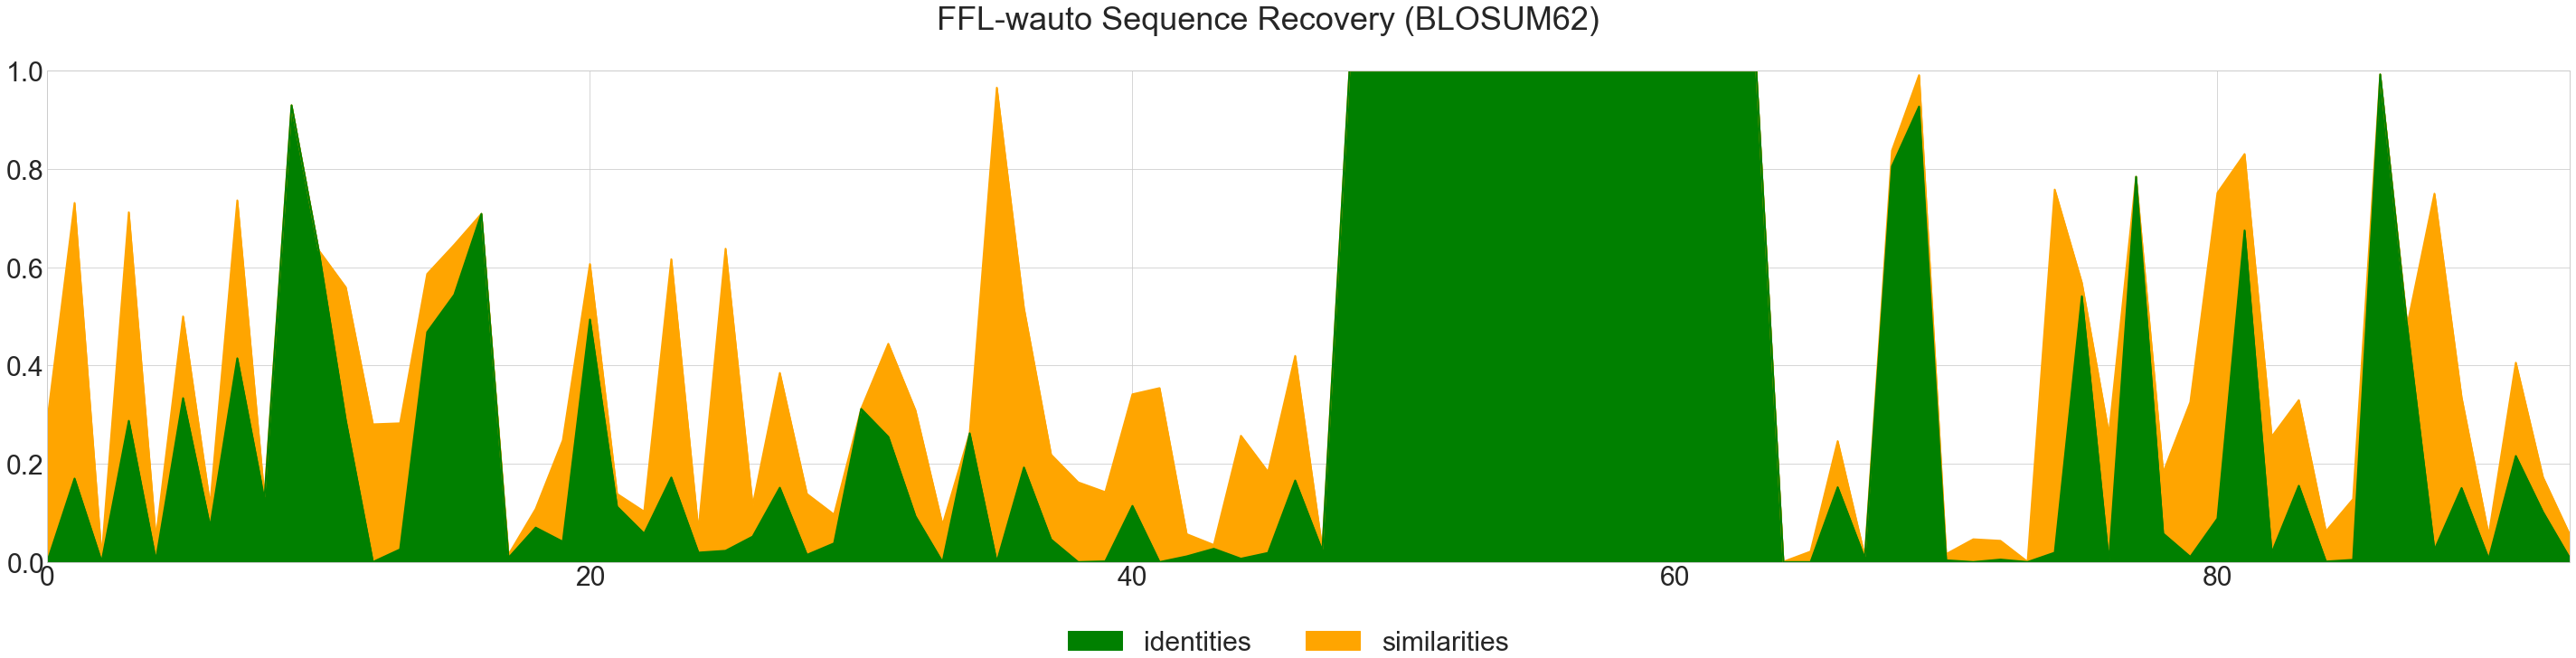

In [11]:
matplotlib.rcParams.update({'font.size': 30})
readme_utils.plot.plot_aa_similarities( df, info, base )

## HMM analysis
Check sequence recovery against the template's hmm.

   count experiment fragments benchmark
0  959    abinitio   auto      T05     
1  1691   abinitio   picker    T05     
2  3485   abinitio   wauto     T05     
3  6986   nubinitio  auto      T05     
4  8751   nubinitio  picker    T05     
5  10292  nubinitio  wauto     T05     


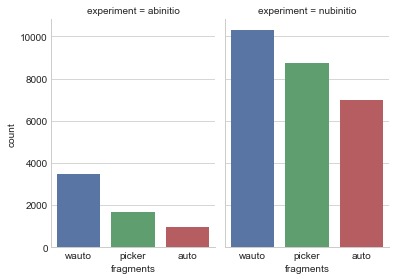

In [12]:
hmm = readme_utils.io.load_hmm_data( df, info )
print hmm
matplotlib.rcParams.update({'font.size': 10})
sns.factorplot(x="fragments", y="count", col="experiment", order=["wauto", "picker", "auto"],
                data=hmm, kind="bar", size=4, aspect=.7);
plt.show()

## Success?
We measure success over the top 10% scored decoys of each experiment/fragment type; comparing the performance of FFL vs. that of _abinitio_.

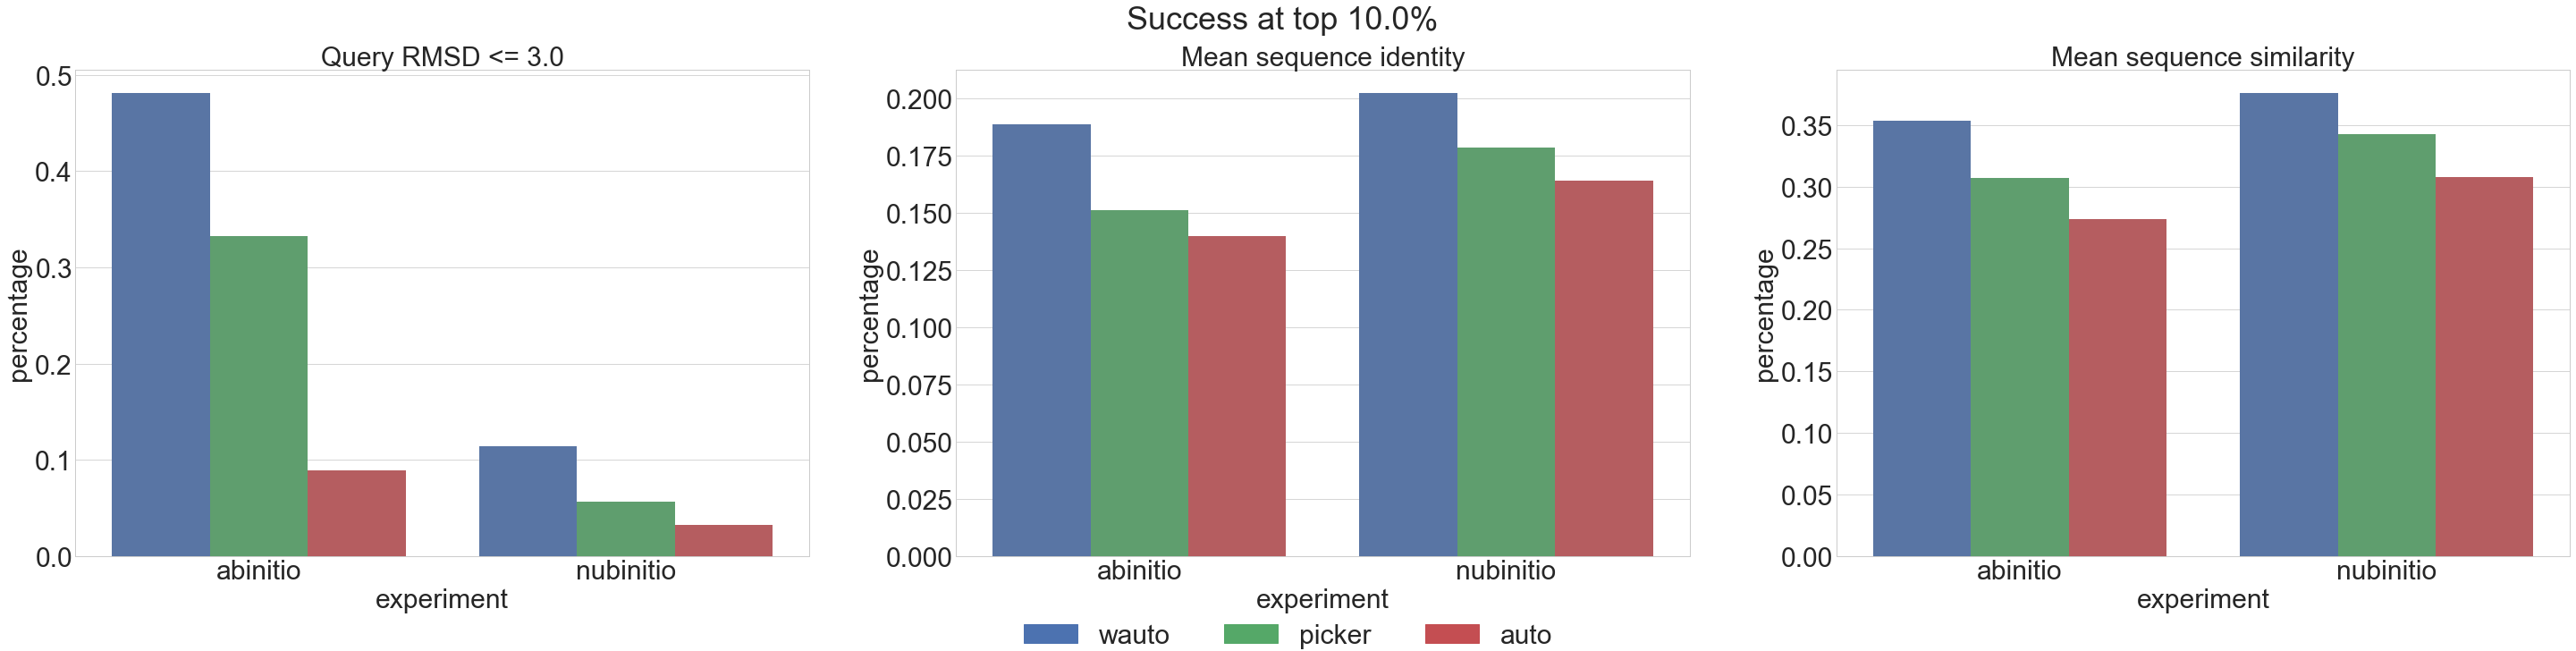

In [13]:
matplotlib.rcParams.update({'font.size': 30})
readme_utils.plot.check_success(df, info, base, 0.1, 3.0)